In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np

In [20]:
# loading data from disk.
model_archs = ["lstm", "bert-base-uncased", "roberta-base", "gpt2"]
results = {}
for model_arch in model_archs:
    csv_mean = f"./csv-results/{model_arch}-ks-mean.csv"
    csv_std = f"./csv-results/{model_arch}-ks-std.csv"
    mean_df = pd.read_csv(csv_mean).sort_values(by=['k'])
    std_df = pd.read_csv(csv_std).sort_values(by=['k'])
    
    ks_mean = {
        "ICaCE-L2" : np.array(mean_df["ICaCE-L2"].tolist()),
        "ICaCE-cosine" : np.array(mean_df["ICaCE-cosine"].tolist()),
        "ICaCE-normdiff" : np.array(mean_df["ICaCE-normdiff"].tolist()),
        "macro-f1" : np.array(mean_df["macro-f1"].tolist())
    }
    
    ks_std = {
        "ICaCE-L2" : np.array(std_df["ICaCE-L2"].tolist()),
        "ICaCE-cosine" : np.array(std_df["ICaCE-cosine"].tolist()),
        "ICaCE-normdiff" : np.array(std_df["ICaCE-normdiff"].tolist()),
        "macro-f1" : np.array(std_df["macro-f1"].tolist())
    }
    
    results[model_arch] = {
        "mean" : ks_mean,
        "std" : ks_std
    }
    
    ks = mean_df["k"].tolist()
# loading non-CPM results.


In [73]:
def make_single_plot(ax, x, y, y_std, color, marker, ylims, label=None):
    ax.plot(x, y, color=color, marker=marker, markersize=8, label=label)
    ax.fill_between(x, y-y_std, y+y_std, color=color, alpha=0.1)
    ax.set_ylim(ylims[0], ylims[1])
    ax.set_xticks(x)
    ax.set_xscale('log')
    return ax

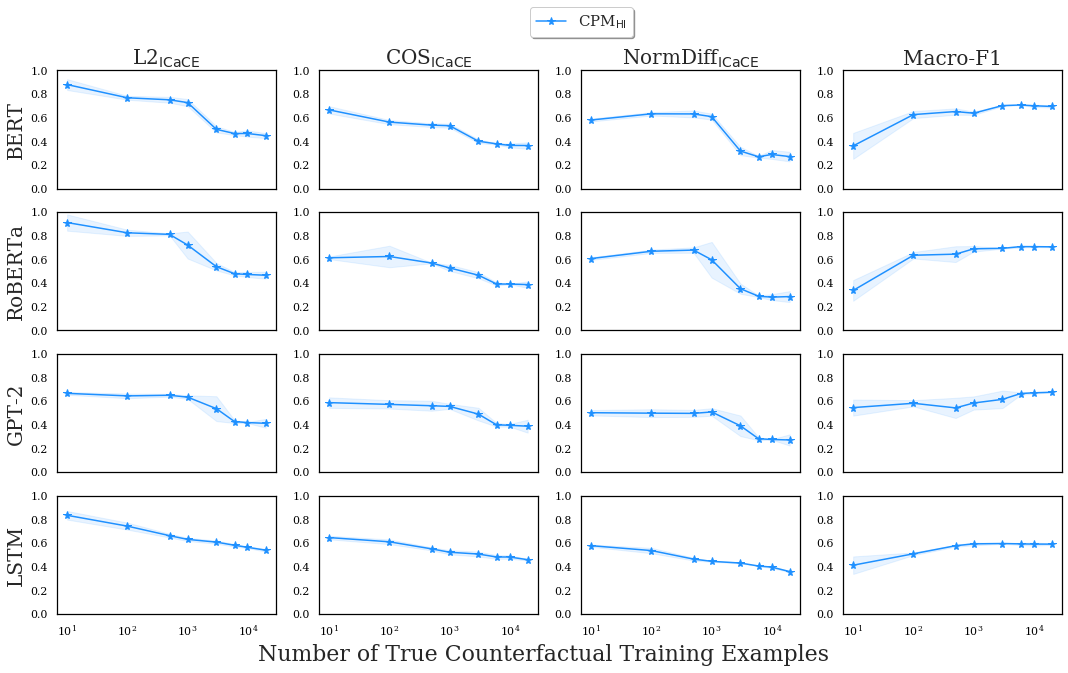

In [75]:
plt.rcParams["font.family"] = "DejaVu Serif"
font = {'family' : 'DejaVu Serif',
        'size'   : 20}
plt.rc('font', **font)
items = ["ICaCE-L2", "ICaCE-cosine", "ICaCE-normdiff", "macro-f1"]
with plt.rc_context({
    'axes.edgecolor':'black', 'xtick.color':'black', 
    'ytick.color':'black', 'axes.facecolor':'white', 
}):
    fig, axs = plt.subplots(4, 4, figsize=(18, 10))
    
    for i in range(0, 4):
        make_single_plot(
            axs[0,i], ks, results["bert-base-uncased"]["mean"][items[i]], 
            results["bert-base-uncased"]["std"][items[i]], 
            color="dodgerblue", marker="*", ylims=[0.00, 1.00], label=r'CPM$_{\rm HI}$'
        )
    axs[0,0].legend(
        loc='upper center', bbox_to_anchor=(2.4, 1.6),
        ncol=6, fancybox=True, shadow=True, fontsize=15, facecolor="white"
    )

    for i in range(0, 4):
        make_single_plot(
            axs[1,i], ks, results["roberta-base"]["mean"][items[i]], 
            results["roberta-base"]["std"][items[i]], 
            color="dodgerblue", marker="*", ylims=[0.00, 1.00], label=r'CPM$_{\rm HI}$'
        )
        
    for i in range(0, 4):
        make_single_plot(
            axs[2,i], ks, results["gpt2"]["mean"][items[i]], 
            results["gpt2"]["std"][items[i]], 
            color="dodgerblue", marker="*", ylims=[0.00, 1.00], label=r'CPM$_{\rm HI}$'
        )
        
    for i in range(0, 4):
        make_single_plot(
            axs[3,i], ks, results["lstm"]["mean"][items[i]], 
            results["lstm"]["std"][items[i]], 
            color="dodgerblue", marker="*", ylims=[0.00, 1.00], label=r'CPM$_{\rm HI}$'
        )
    for i in range(0, 3):
        for j in range(0, 4):
            axs[i,j].set_xticks([])
    
    # random stuffs about ticks, titles.
    axs[0,0].set_title(r'L2$_{\rm ICaCE}$', fontsize=20)
    axs[0,1].set_title(r'COS$_{\rm ICaCE}$', fontsize=20)
    axs[0,2].set_title(r'NormDiff$_{\rm ICaCE}$', fontsize=20)
    axs[0,3].set_title(r'Macro-F1', fontsize=20)
    
    axs[0,0].set_ylabel("BERT", fontsize=20)
    axs[1,0].set_ylabel("RoBERTa", fontsize=20)
    axs[2,0].set_ylabel("GPT-2", fontsize=20)
    axs[3,0].set_ylabel("LSTM", fontsize=20)

    plt.subplots_adjust(wspace=0.2, 
                        hspace=0.2)
    _ = fig.text(0.5, 0.06, r'Number of True Counterfactual Training Examples', ha='center', fontsize=22)
    plt.savefig("./figures/kshots-experiments.png",dpi=200, bbox_inches='tight')
